# Car Prediction

In [2]:
# All the imports reside here
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
# read the cardata csv file using pandas read_csv method

cars = pd.read_csv('cardata.csv')

In [4]:
# apply head function on the dataframe and see what all columns it has
# head() -> provides top 5 records from the dataset
# tail() -> provides last 5 records from the dataset
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Understandings
# selling_price and present_price are in units [lakhs]
# Fuel_type, seller_type,Transmission have categorical values

In [6]:
# It is always wise to check the datatypes of the columns, instead of assuming based on the data it has
# Lets use info() method and check the datatypes and missing values

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Understanding
# We dont have any missing or null values in our dataframe

In [8]:
# Lets look at the centeral tendencey value and percentails
# we can get those values by using describe() method
# by default, it only provides the measure for numerical values
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# Understanding 

# By observing the mean and 50 percentail, we can tell that there are some outliers

In [10]:
# Lets try to see the details for categorical values 

cars.describe(include = 'O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [11]:
# Understaings

# Looks like there are 3/2/2 unique values for fuel/seller/transmission columns respectively
# We can also see the mode[most frequent value] for each column

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

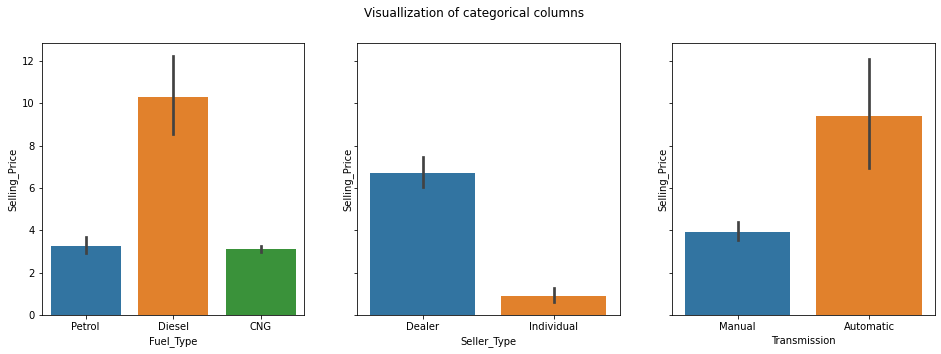

In [12]:
# visualization for Categorical Columns

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
fig.suptitle('Visuallization of categorical columns')

# Fuel_Type
sns.barplot(x = 'Fuel_Type', y = 'Selling_Price', data = cars, ax = axes[0])

# Seller_Type
sns.barplot(x = 'Seller_Type', y = 'Selling_Price', data = cars, ax = axes[1])

# Transmission
sns.barplot(x = 'Transmission', y = 'Selling_Price', data = cars, ax = axes[2])

In [13]:
# Understandings 

# Fuel_Type of Diesel have higher resale value
# Dealer cars are sold for higher values [marketing techniques, I guess :P]
# Automatic cars have high resale value

In [14]:
# Feature Engineering 

# we will be converting the year column into number of years
cars['Year'] = 2021 - cars['Year']

# we can also fetch the current year from datetime library
# current_year = datatime.datatime.now().year

In [15]:
# visualization for Numerical Columns

# There are multiple plotting for numerical values
# 1) Scatter plot
# 2) regplot
# 3) lmplot

# Here we will be using the regplot, as it plots the regression line along with points

# numerial columns = [Year	Selling_Price	Present_Price	Kms_Driven	Owner]

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

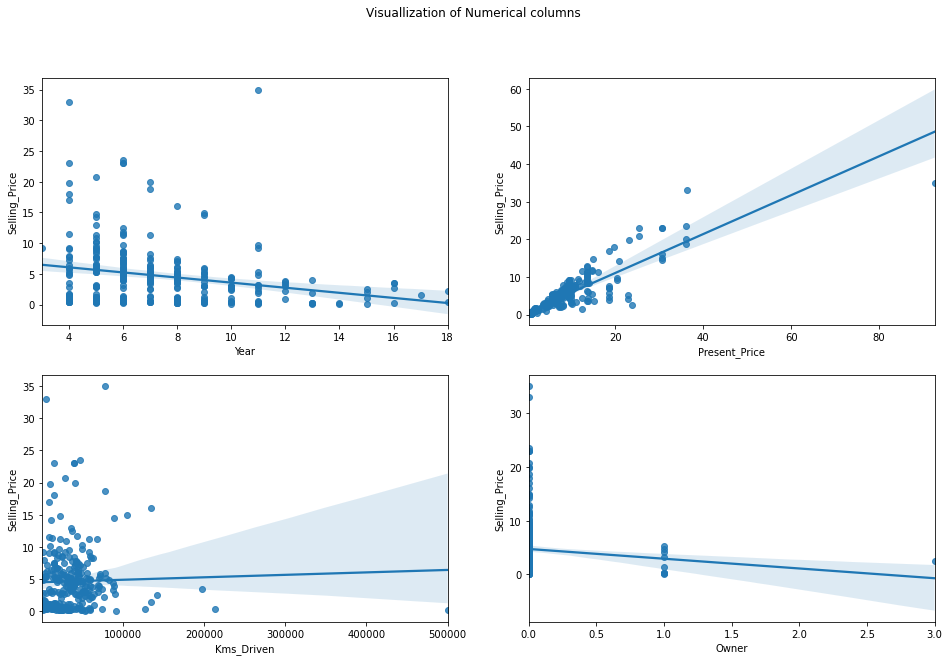

In [16]:
fig, axes = plt.subplots(2, 2, figsize = (16,10))
fig.suptitle('Visuallization of Numerical columns')

sns.regplot(x = 'Year', y = 'Selling_Price', data = cars, ax = axes[0,0])
sns.regplot(x = 'Present_Price', y = 'Selling_Price', data = cars, ax = axes[0,1])
sns.regplot(x = 'Kms_Driven', y = 'Selling_Price', data = cars, ax = axes[1,0])
sns.regplot(x = 'Owner', y = 'Selling_Price', data = cars, ax = axes[1,1])

In [17]:
# Understandings 

# Year : with increase in the number of years the car bought, the price is descreasing
# Present_price : sellling price is highly proportional with the present_price
# Kms_Driven : selling price is inversely proportional to selling price
# Owner : resale price is more for first hand cars, compared to second and third hand cars

<AxesSubplot:xlabel='Owner'>

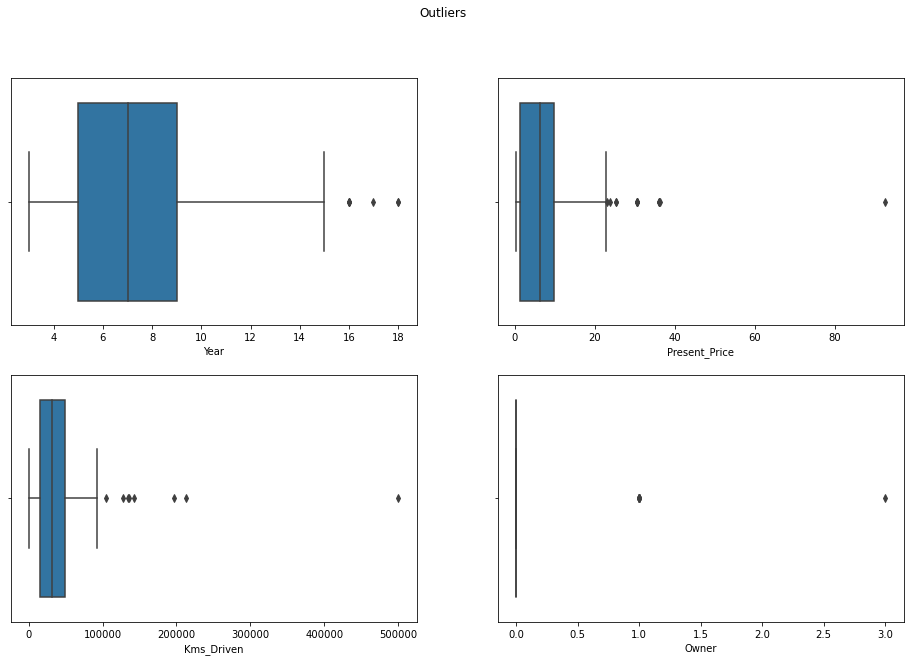

In [18]:
# Outliers 

fig, axes = plt.subplots(2, 2, figsize = (16,10))
fig.suptitle('Outliers')

sns.boxplot(x = 'Year', data = cars, ax = axes[0,0])
sns.boxplot(x = 'Present_Price', data = cars, ax = axes[0,1])
sns.boxplot(x = 'Kms_Driven', data = cars, ax = axes[1,0])
sns.boxplot(x = 'Owner', data = cars, ax = axes[1,1])

In [19]:
# Understandings 

# we can see there are few outliers for the above columns.

In [20]:
# Converting the categorical values into Numerical values

# There are 2 types
# 1) Ordinal Encoding
# 2) OneHot Encoding

# in pandas there is a method called get_dummies() which does the operation of OneHotEncoding
# we are using drop_first params, to eradicate the dummy varaible trap

In [21]:
cars = pd.get_dummies(cars, columns = ['Fuel_Type','Seller_Type','Transmission'], drop_first = True)

In [22]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,7,3.35,5.59,27000,0,0,1,0,1
1,sx4,8,4.75,9.54,43000,0,1,0,0,1
2,ciaz,4,7.25,9.85,6900,0,0,1,0,1
3,wagon r,10,2.85,4.15,5200,0,0,1,0,1
4,swift,7,4.60,6.87,42450,0,1,0,0,1


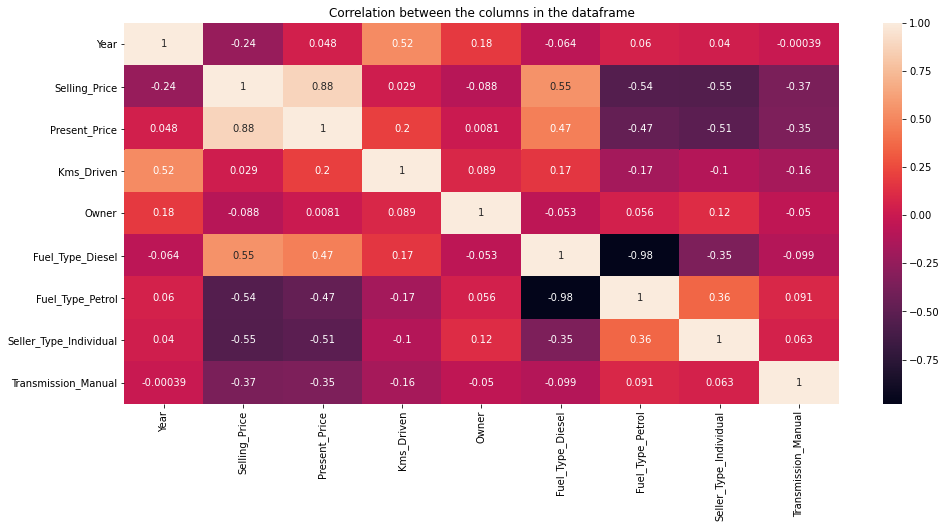

In [23]:
# lets see the correlation between the each columns in the dataframe 

plt.figure(figsize = (16,7))
sns.heatmap(cars.corr(), annot = True)
plt.title('Correlation between the columns in the dataframe')
plt.show()

In [24]:
# split the data into train_data and test_data from train_test_split library

train_data , test_data = train_test_split(cars, test_size = 0.2 , random_state = 42)

In [25]:
# we can see that 20% of the data is sent to test and remaining into train data

print(train_data.shape)
print(test_data.shape)

(240, 10)
(61, 10)


In [26]:
# If we see the numerial columns ['Year','Selling_Price','Present_Price','Kms_Driven']

# All the values of these columns are in different units, lets try to normalize them
# There are 2 type of normalizations
# 1) StandardScaler
# 2) MinMaxScalar  [log normalization]

# Lets use StandaradScaler

In [27]:
# We will be doing fit transform for only train data and transform for test data to eradcate data leakage

num_cols = ['Year','Selling_Price','Present_Price','Kms_Driven']
scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

In [28]:
X_train = train_data.drop(['Car_Name', 'Selling_Price'], axis = 1) 
y_train = train_data['Selling_Price']
X_test = test_data.drop(['Car_Name', 'Selling_Price'], axis = 1) 
y_test = test_data['Selling_Price']

In [29]:
print("X_train Shape: "+str(X_train.shape))
print("y_train Shape: "+str(y_train.shape))
print("X_test Shape: "+str(X_test.shape))
print("y_test Shape: "+str(y_test.shape))

X_train Shape: (240, 8)
y_train Shape: (240,)
X_test Shape: (61, 8)
y_test Shape: (61,)


In [30]:
# Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

<AxesSubplot:ylabel='Selling_Price'>

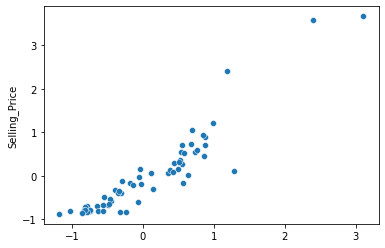

In [31]:
sns.scatterplot(predicted , y_test)

In [32]:


print("Mean absolute error : "+str(metrics.mean_absolute_error(predicted , y_test)))
print("Mean sqaure error : "+str(metrics.mean_squared_error(predicted , y_test)))
print("Root Mean absolute error : "+str(np.sqrt(metrics.mean_squared_error(predicted , y_test))))

print("R2 Score : "+str(metrics.r2_score(predicted , y_test)))

Mean absolute error : 0.2365416476113682
Mean sqaure error : 0.1315881715879992
Root Mean absolute error : 0.36275083954141196
R2 Score : 0.7948624857739331
